Q : Guys, mau berlangganan aplikasi streaming film nih.. Enaknya pilih Amazon Prime, Disney+, Hulu, atau Netflix yaa?

A : Eits bentar sob, kita visualisasiin dulu yuk gimana jenis film yang disediain di keempatnya!

# Data

Okay, pada visualisasi data kali ini, kita akan menggunakan 4 dataset yang diperoleh dari Kaggle. Berikut ini link nya :

 - Amazon Prime : https://www.kaggle.com/datasets/shivamb/amazon-prime-movies-and-tv-shows
 - Disney+ : https://www.kaggle.com/datasets/shivamb/disney-movies-and-tv-shows
 - Hulu : https://www.kaggle.com/datasets/shivamb/hulu-movies-and-tv-shows
 - Netflix : https://www.kaggle.com/datasets/shivamb/netflix-shows

In [1]:
# Import Modules

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_amazon = pd.read_csv('amazon_prime_titles.csv')
df_amazon.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...


In [3]:
df_disney = pd.read_csv('disney_plus_titles.csv')
df_disney.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!


In [4]:
df_hulu = pd.read_csv('hulu_titles.csv')
df_hulu.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Ricky Velez: Here's Everything,NaN,NaN,NaN,"October 24, 2021",2021,TV-MA,NaN,"Comedy, Stand Up",​Comedian Ricky Velez bares it all with his ho...


In [5]:
df_netflix = pd.read_csv('netflix_titles.csv')
df_netflix.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."


 # EDA

Feature yang akan kita gunakan adalah `type`, `release_year`, `rating`, dam `listed_in`.

Agar lebih rapi, akan kita rename feature yang ada.

In [6]:
df_amazon = df_amazon[['type', 'release_year', 'rating', 'listed_in']]
df_amazon.rename({
    'type' : 'Type', 
    'release_year' : 'Release Year',
    'rating' : 'Rating',
    'listed_in' : 'Genre',
} , inplace = True , axis = 1)
df_amazon.head(1)

,Type,Release Year,Rating,Genre
0,Movie,2014,NaN,"Comedy, Drama"


In [7]:
df_disney = df_disney[['type', 'release_year', 'rating', 'listed_in']]
df_disney.rename({
    'type' : 'Type', 
    'release_year' : 'Release Year',
    'rating' : 'Rating',
    'listed_in' : 'Genre',
} , inplace = True , axis = 1)
df_disney.head(1)

,Type,Release Year,Rating,Genre
0,Movie,2016,TV-G,"Animation, Family"


In [8]:
df_hulu = df_hulu[['type', 'release_year', 'rating', 'listed_in']]
df_hulu.rename({
    'type' : 'Type', 
    'release_year' : 'Release Year',
    'rating' : 'Rating',
    'listed_in' : 'Genre',
} , inplace = True , axis = 1)
df_hulu.head(1)

,Type,Release Year,Rating,Genre
0,Movie,2021,TV-MA,"Comedy, Stand Up"


In [9]:
df_netflix = df_netflix[['type', 'release_year', 'rating', 'listed_in']]
df_netflix.rename({
    'type' : 'Type', 
    'release_year' : 'Release Year',
    'rating' : 'Rating',
    'listed_in' : 'Genre',
} , inplace = True , axis = 1)
df_netflix.head(1)

,Type,Release Year,Rating,Genre
0,Movie,2020,PG-13,Documentaries


In [10]:
# Cek info lebih detail untuk setiap fitur
def showDetailInfo(df_model):
    listItem = []

    for col in df_model.columns:
        listItem.append([
            col, 
            df_model[col].dtype, 
            df_model[col].isna().sum(), 
            round((df_model[col].isna().sum()/len(df_model[col]))*100, 2),
            df_model[col].nunique(), 
            list(df_model[col].drop_duplicates().sample(2).values)
        ]);
        
    return [
        ['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
        listItem
    ]

In [11]:
def getGenreCount(df_data):
    all_genre = []
    genres = []
    count = []
    
    for genre in df_data['Genre']:
        all_genre.extend(genre.split(', '))
        
    genre_set = set(all_genre)

    for data in genre_set:
        genres.append(data)
        count.append(all_genre.count(data))
        
    return [genres, count]

In [12]:
def setPeriod(data):
    if data['Release Year'] < 1980:
        return '< 1980'
    elif data['Release Year'] < 2000:
        return '1980 - 1999'
    elif data['Release Year'] < 2005:
        return '2000 - 2004'
    elif data['Release Year'] < 2010:
        return '2005 - 2009'
    elif data['Release Year'] < 2015:
        return '2010 - 2014'
    elif data['Release Year'] < 2020:
        return '2015 - 2019'
    else:
        return '> 2019'

**Amazon Prime**

In [13]:
df_amazon_desc = pd.DataFrame(columns=showDetailInfo(df_amazon)[0],
                         data=showDetailInfo(df_amazon)[1])
df_amazon_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Type,object,0,0.00,2,"[TV Show, Movie]"
1,Release Year,int64,0,0.00,100,"[1920, 1965]"
2,Rating,object,337,3.49,24,"[16, nan]"
3,Genre,object,0,0.00,518,"[Action, Drama, International, Adventure, Fant..."


In [14]:
# Remove Missing Value (Drop Value)

df_amazon.dropna(inplace = True)

In [15]:
amazon_gen = getGenreCount(df_amazon)
amazon_genre = pd.DataFrame({
    'Genre': amazon_gen[0], 'Count': amazon_gen[1]
})
amazon_genre

,Genre,Count
0,Suspense,1439
1,International,355
2,Unscripted,152
3,Talk Show and Variety,14
4,Western,228
5,Music Videos and Concerts,153
6,LGBTQ,111
7,Fitness,83
8,Adventure,254
9,Kids,1056


In [16]:
df_amazon['Year Period'] = df_amazon.apply(setPeriod, axis=1)

**Disney+**

In [17]:
df_disney_desc = pd.DataFrame(columns=showDetailInfo(df_disney)[0],
                         data=showDetailInfo(df_disney)[1])
df_disney_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Type,object,0,0.00,2,"[TV Show, Movie]"
1,Release Year,int64,0,0.00,90,"[1974, 2009]"
2,Rating,object,3,0.21,9,"[TV-14, PG-13]"
3,Genre,object,0,0.00,329,"[Comedy, Coming of Age, Crime, Comedy, Coming ..."


In [18]:
# Remove Missing Value (Drop Value)

df_disney.dropna(inplace = True)

In [19]:
disney_gen = getGenreCount(df_disney)
disney_genre = pd.DataFrame({
    'Genre': disney_gen[0], 'Count': disney_gen[1]
})
disney_genre

,Genre,Count
0,Anthology,27
1,Animation,542
2,Coming of Age,205
3,Buddy,40
4,Action-Adventure,452
5,Police/Cop,1
6,Sports,43
7,Romantic Comedy,2
8,Western,7
9,Parody,9


In [20]:
df_disney['Year Period'] = df_disney.apply(setPeriod, axis=1)

**Hulu**

In [21]:
df_hulu_desc = pd.DataFrame(columns=showDetailInfo(df_hulu)[0],
                         data=showDetailInfo(df_hulu)[1])
df_hulu_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Type,object,0,0.00,2,"[TV Show, Movie]"
1,Release Year,int64,0,0.00,72,"[1958, 1960]"
2,Rating,object,520,16.92,88,"[106 min, 12 Seasons]"
3,Genre,object,0,0.00,442,"[Adult Animation, Black Stories, Comedy, Black..."


In [22]:
# Remove Missing Value (Drop Value)

df_hulu.dropna(inplace = True)

In [23]:
hulu_gen = getGenreCount(df_hulu)
hulu_genre = pd.DataFrame({
    'Genre': hulu_gen[0], 'Count': hulu_gen[1]
})
hulu_genre

,Genre,Count
0,Cooking & Food,68
1,News,44
2,International,196
3,Health & Wellness,7
4,Reality,224
5,Lifestyle & Culture,129
6,Sketch Comedy,3
7,Adventure,534
8,Horror,269
9,Drama,821


In [24]:
df_hulu['Year Period'] = df_hulu.apply(setPeriod, axis=1)

**Netflix**

In [25]:
df_netflix_desc = pd.DataFrame(columns=showDetailInfo(df_netflix)[0],
                         data=showDetailInfo(df_netflix)[1])
df_netflix_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Type,object,0,0.00,2,"[TV Show, Movie]"
1,Release Year,int64,0,0.00,74,"[1947, 1999]"
2,Rating,object,4,0.05,17,"[G, TV-14]"
3,Genre,object,0,0.00,514,"[Comedies, Horror Movies, Independent Movies, ..."


In [26]:
# Remove Missing Value (Drop Value)

df_netflix.dropna(inplace = True)

In [27]:
netflix_gen = getGenreCount(df_netflix)
netflix_genre = pd.DataFrame({
    'Genre': netflix_gen[0], 'Count': netflix_gen[1]
})
netflix_genre

,Genre,Count
0,TV Dramas,763
1,Kids' TV,450
2,Children & Family Movies,641
3,Romantic Movies,616
4,Crime TV Shows,470
5,Reality TV,255
6,Stand-Up Comedy,343
7,Spanish-Language TV Shows,174
8,Classic & Cult TV,28
9,Romantic TV Shows,370


In [28]:
df_netflix['Year Period'] = df_netflix.apply(setPeriod, axis=1)

# Data Visualization

Okay, sekarang kita memiliki beberapa dataframe, yaitu :

 - df_amazon : Type, Release Year, Rating, Year Period film di Amazon Prime
 - amazon_genre : Genre dan total film per genre tersebut di Amazon Prime
 

 - df_disney : Type, Release Year, Rating, Year Period film di Disney
 - disney_genre : Genre dan total film per genre tersebut di Disney
 

 - df_hulu : Type, Release Year, Rating, Year Period film di Hulu
 - hulu_genre : Genre dan total film per genre tersebut di Hulu
 

 - df_netflix : Type, Release Year, Rating, Year Period film di Netflix
 - netflix_genre : Genre dan total film per genre tersebut di Netflix
 


Kemudian, akan kita visualisasikan untuk :
 - Release year period film di 4 aplikasi
 - Type film di 4 aplikasi
 - Rating film di 4 aplikasi
 - Genre film di 4 aplikasi

**Amazon Prime**

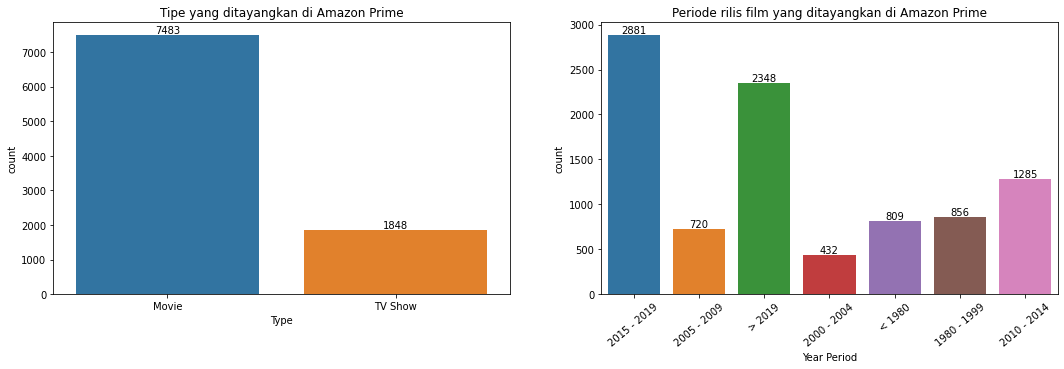

In [29]:
plt.figure(figsize = (18,5))

plt.subplot(1,2,1)
ax = sns.countplot(df_amazon['Type'])
ax.bar_label(ax.containers[0])
plt.title('Tipe yang ditayangkan di Amazon Prime', size = 12)

plt.subplot(1,2,2)
ax = sns.countplot(df_amazon['Year Period'])
ax.bar_label(ax.containers[0])
plt.title('Periode rilis film yang ditayangkan di Amazon Prime', size = 12)
plt.xticks(rotation=40)

plt.show()

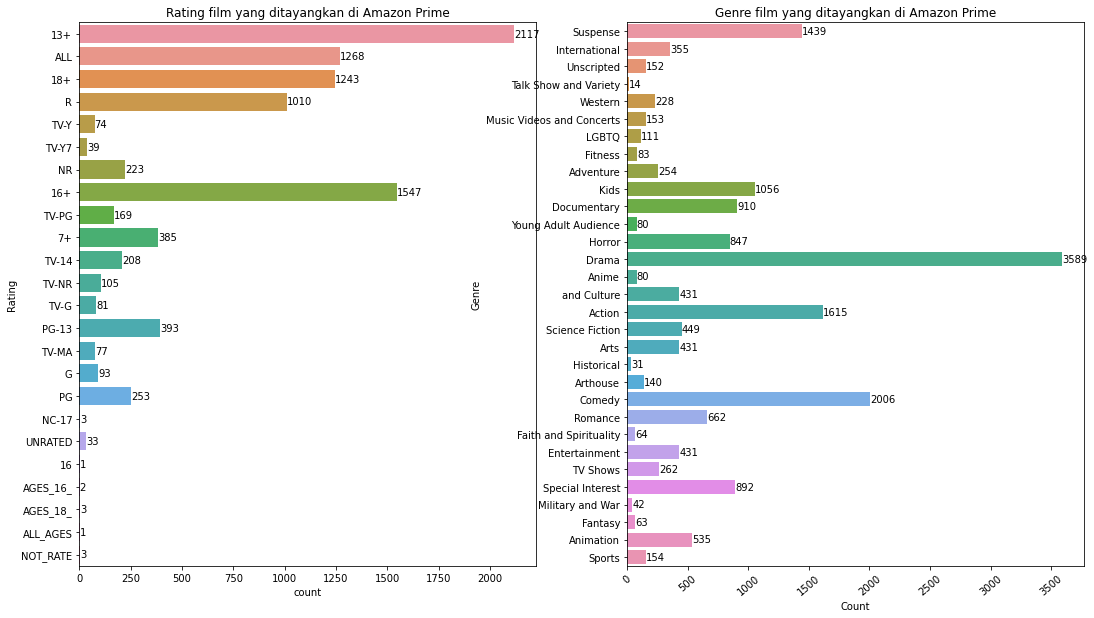

In [30]:
plt.figure(figsize = (18,10))

plt.subplot(1,2,1)
ax = sns.countplot(data = df_amazon, y='Rating')
ax.bar_label(ax.containers[0])
plt.title('Rating film yang ditayangkan di Amazon Prime', size = 12)

plt.subplot(1,2,2)
ax = sns.barplot(data=amazon_genre, y='Genre', x='Count')
ax.bar_label(ax.containers[0])
plt.title('Genre film yang ditayangkan di Amazon Prime', size = 12)
plt.xticks(rotation=40)

plt.show()

Dari 9331 film, Amazon Prime menayangkan lebih banyak Movie daripada TV Show. Film yang disediakan juga beragam, dengan jumlah terbanyak adalah film dari tahun 2015 hingga sekarang. Film yang disediakan Amazon Prime juga banyak untuk rating 13+ dengan genre terbanyak pada Drama dan Komedi.

**Disney+**

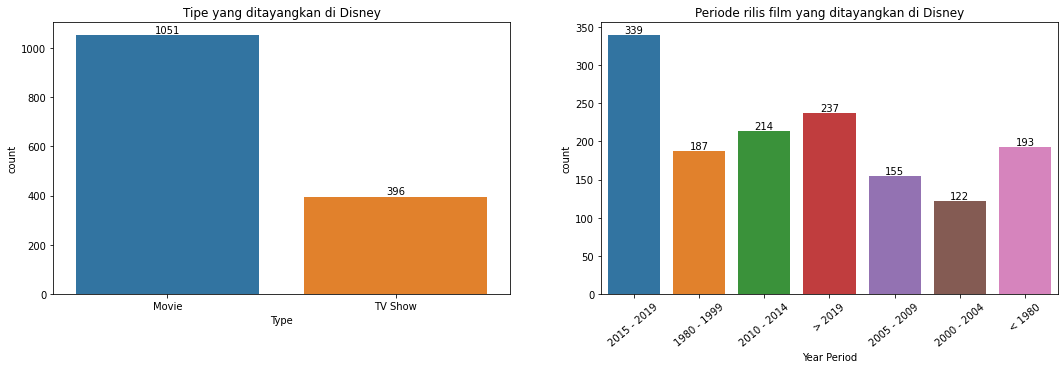

In [31]:
plt.figure(figsize = (18,5))

plt.subplot(1,2,1)
ax = sns.countplot(df_disney['Type'])
ax.bar_label(ax.containers[0])
plt.title('Tipe yang ditayangkan di Disney', size = 12)

plt.subplot(1,2,2)
ax = sns.countplot(df_disney['Year Period'])
ax.bar_label(ax.containers[0])
plt.title('Periode rilis film yang ditayangkan di Disney', size = 12)
plt.xticks(rotation=40)

plt.show()

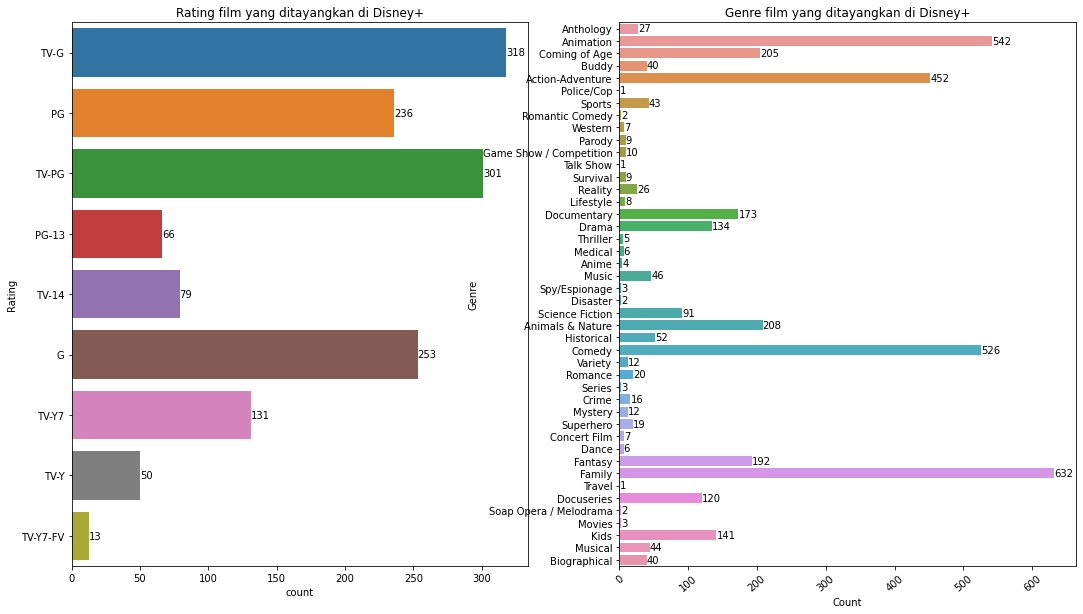

In [32]:
plt.figure(figsize = (18,10))

plt.subplot(1,2,1)
ax = sns.countplot(data = df_disney, y='Rating')
ax.bar_label(ax.containers[0])
plt.title('Rating film yang ditayangkan di Disney+', size = 12)

plt.subplot(1,2,2)
ax = sns.barplot(data=disney_genre, y='Genre', x='Count')
ax.bar_label(ax.containers[0])
plt.title('Genre film yang ditayangkan di Disney+', size = 12)
plt.xticks(rotation=40)

plt.show()

Dari 1447 film, Disney+ menayangkan lebih banyak Movie daripada TV Show. Film yang disediakan juga beragam, dengan jumlah terbanyak adalah film dari tahun 2015 hingga sekarang. Film yang disediakan Disney+ juga banyak untuk rating TV-G dan TV-PG dengan genre terbanyak pada Family, Animation, dan Comedy.

**Hulu**

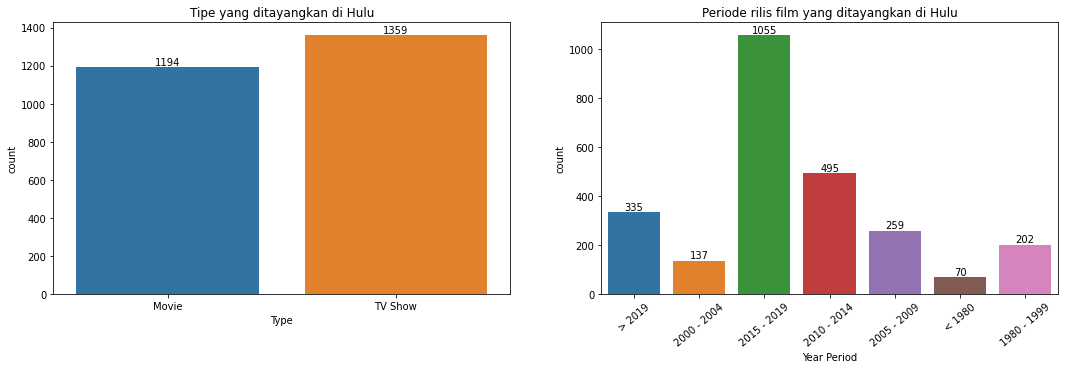

In [33]:
plt.figure(figsize = (18,5))

plt.subplot(1,2,1)
ax = sns.countplot(df_hulu['Type'])
ax.bar_label(ax.containers[0])
plt.title('Tipe yang ditayangkan di Hulu', size = 12)

plt.subplot(1,2,2)
ax = sns.countplot(df_hulu['Year Period'])
ax.bar_label(ax.containers[0])
plt.title('Periode rilis film yang ditayangkan di Hulu', size = 12)
plt.xticks(rotation=40)

plt.show()

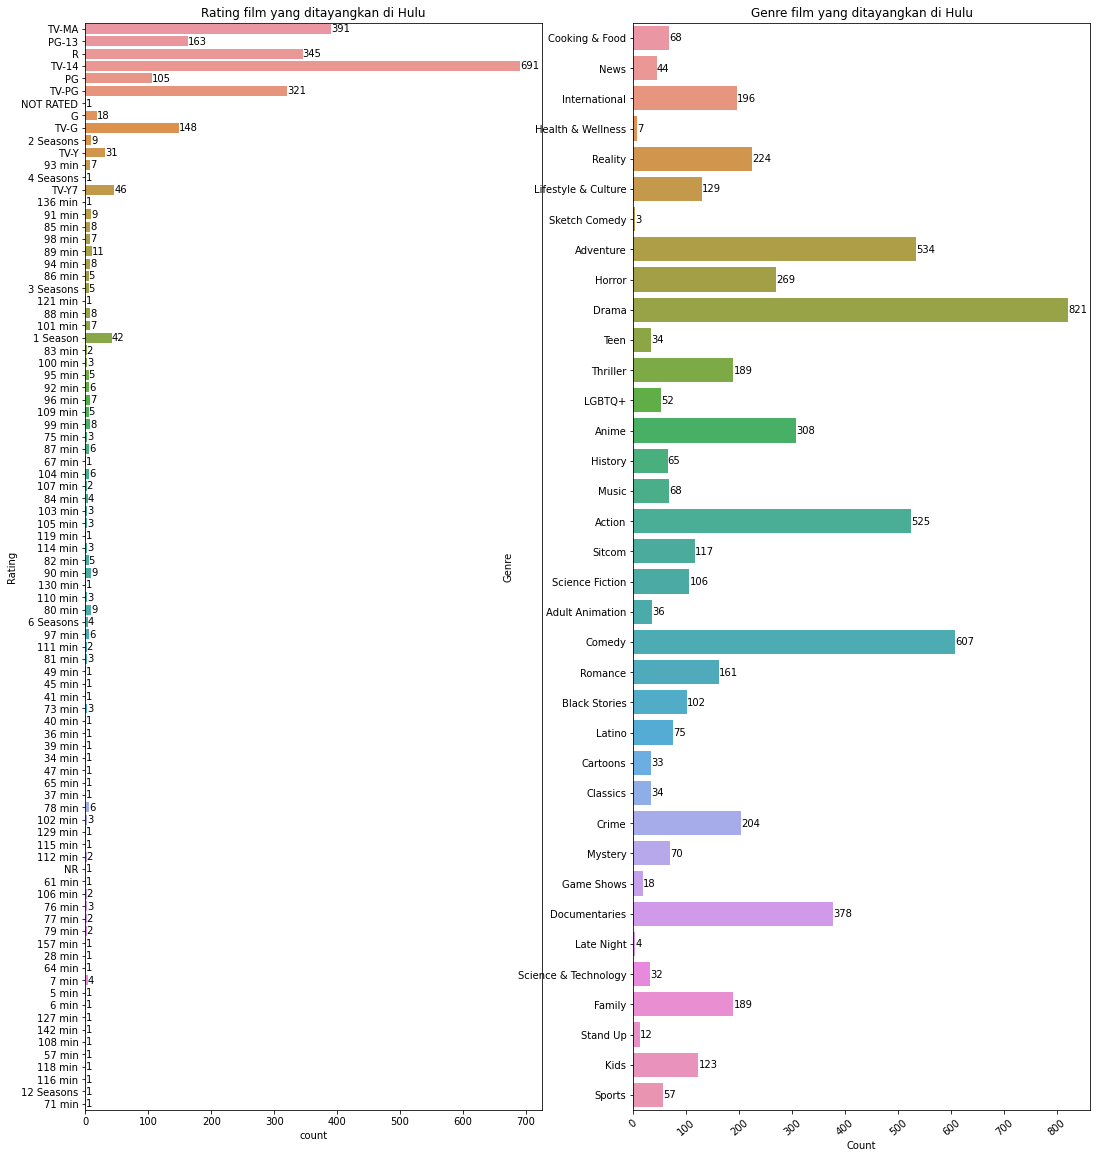

In [34]:
plt.figure(figsize = (18,20))

plt.subplot(1,2,1)
ax = sns.countplot(data = df_hulu, y='Rating')
ax.bar_label(ax.containers[0])
plt.title('Rating film yang ditayangkan di Hulu', size = 12)

plt.subplot(1,2,2)
ax = sns.barplot(data=hulu_genre, y='Genre', x='Count')
ax.bar_label(ax.containers[0])
plt.title('Genre film yang ditayangkan di Hulu', size = 12)
plt.xticks(rotation=40)

plt.show()

Dari 2553 film, Hulu menayangkan lebih banyak TV Show daripada Movie. Film yang disediakan juga beragam, dengan jumlah terbanyak adalah film dari tahun 2015 hingga sekarang. Film yang disediakan Hulu juga banyak untuk rating TV-14 dengan genre terbanyak pada Drama, Comedy, Advendure, dan Action.

**Netflix**

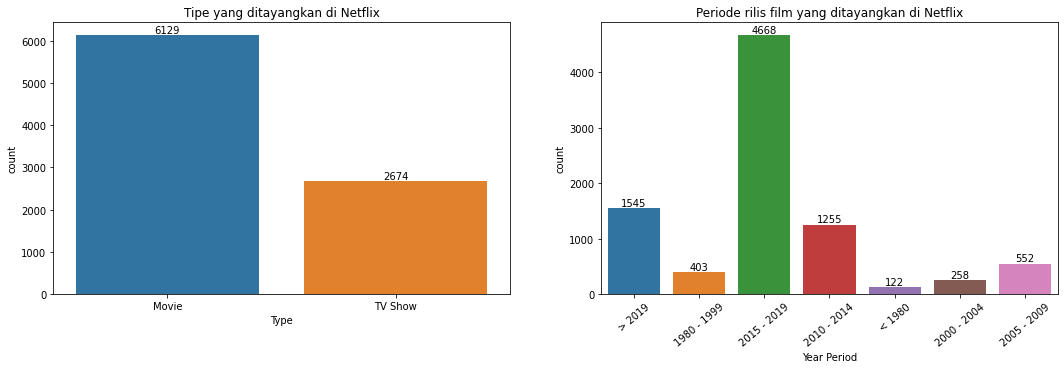

In [35]:
plt.figure(figsize = (18,5))

plt.subplot(1,2,1)
ax = sns.countplot(df_netflix['Type'])
ax.bar_label(ax.containers[0])
plt.title('Tipe yang ditayangkan di Netflix', size = 12)

plt.subplot(1,2,2)
ax = sns.countplot(df_netflix['Year Period'])
ax.bar_label(ax.containers[0])
plt.title('Periode rilis film yang ditayangkan di Netflix', size = 12)
plt.xticks(rotation=40)

plt.show()

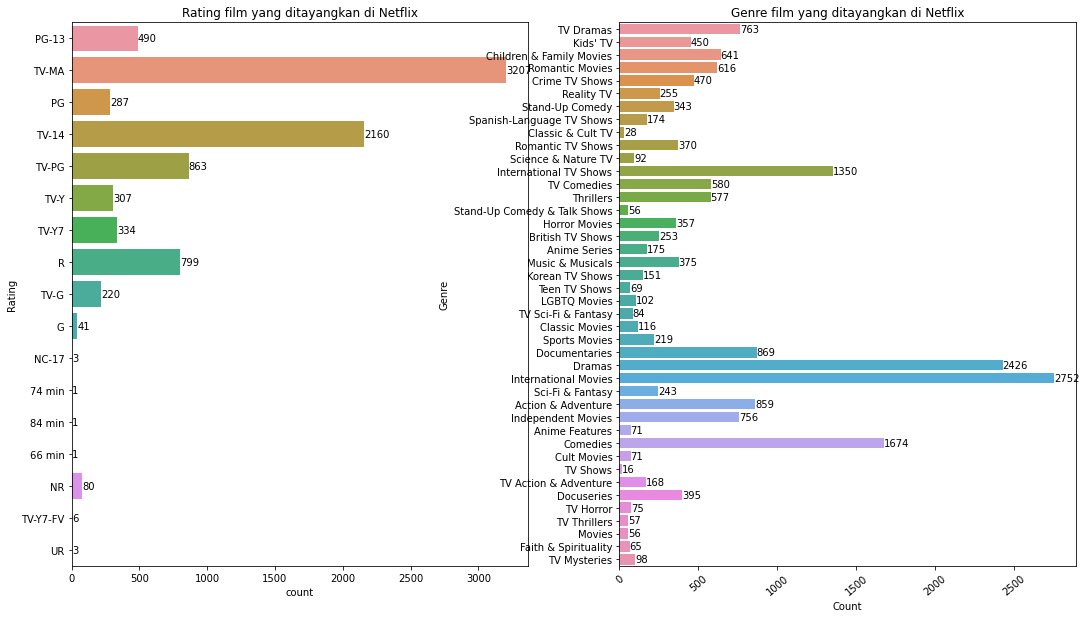

In [36]:
plt.figure(figsize = (18,10))

plt.subplot(1,2,1)
ax = sns.countplot(data = df_netflix, y='Rating')
ax.bar_label(ax.containers[0])
plt.title('Rating film yang ditayangkan di Netflix', size = 12)

plt.subplot(1,2,2)
ax = sns.barplot(data=netflix_genre, y='Genre', x='Count')
ax.bar_label(ax.containers[0])
plt.title('Genre film yang ditayangkan di Netflix', size = 12)
plt.xticks(rotation=40)

plt.show()

Dari 8803 film, Netflix menayangkan lebih banyak Movie dari pada TV Show. Film yang disediakan juga beragam, dengan jumlah terbanyak adalah film dari tahun 2015 hingga sekarang. Film yang disediakan Netflix juga banyak untuk rating TV-MA dan TV-14 dengan genre terbanyak pada International Movies, Dramas, dan Comedies.

# KESIMPULAN

Dari keempat platform tersebut, semuanya banyak menayangkan film tahun 2015 keatas, yang berarti film yang ditayangkan masih tergolong film baru. Amazon Prime dan Netflix adalah platform yang menayangkan paling banyak film. 

Amazon prime banyak menayangkan film dengan rating 13+ dan genre drama dan komedi. Dilihat dari data tersebut, maka amazon prime dapat menjadi pilihan platform streaming untuk keluarga atau remaja.

Netflix sebagai peringkat jumlah film terbanyak kedua, banyak menayangkan film dengan rating TV-MA (Pemirsa Dewasa) dan TV-14 (Pendampingan Orang Tua) dengan genre international movies, drama, dan komedi. Sehingga, netflix dapat menjadi pilihan platform streaming untuk pemirsa dewasa.

Hulu  menayangkan lebih banyak TV Show daripada Movie. Rating film yang ditayangkan adalah TV-14 (Pendampingan Orang Tua) dengan genre drama, komedi, adventure, dan action. Hulu dapat menjadi pilihan platform streaming jika lebih menyukai TV Show.

Disney+ banyak menayangkan film dengan rating TV-G (Semua umur) dan TV-PG (Pendampingan Orang Tua) dengan genre family, animation, dan comedy. Dilihat dari data tersebut, Disney+ dapat menjadi pilihan platform streaming yang cocok untuk ditonton bersama keluarga dan anak-anak.